# Project Objectives
- Document code, process, findings, and key takeaways.
- Make your process repeateable and your report (notebook) easy to read and follow.
- Ask exploratory questions of your data. Answer questions through charts and statistical tests.
- Construct a model to predict tax value ("tax value") using classification techniques.
- Refine your work into a Report.
- Be prepared to answer panel questions.

## Business Goals
- Find drivers for tax value with zillow data. Why are can help predict tax value?
- Construct a ML classification model that accurately predicts tax value.
- Deliver a report that a non-data scientist can read through and understand what steps were taken, why and what was the outcome?

In [1]:
#import warnings
#warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
import scipy.stats as stats
import sklearn.impute as simpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler


import acquire
import prepare
import explore
import wrangle
import env

univariate
    continous
        - histogram
        - boxplot
        - displot
    discrete
        - countplot


bi-/mulit-variate
    continous with continous
        - scatter
        - line
        - pair
        - heat map
        - relplot
    discrete with continous
        - violin
        - catplot
        - sunburst?
        - boxplot
        - swarmplot
        - striplot
    discrete with discrete
        - heatmap
        -
        -


> - ## Acquired the data

> - did basic cleaning (removed whitespaces, dropped nulls, renaming columns), 
> - added decade based on years
> - ## Returning a prep file 

> - removed outliers using Tukey (k=1.5)
> - added a binned version of years (decades)
> - split data
> - did univariate exploration
> - ## Returning a wrangle file 

prepared df shape: (1799429, 8)
train shape: (1079657, 8)
validate shape: (359886, 8)
test shape: (359886, 8)


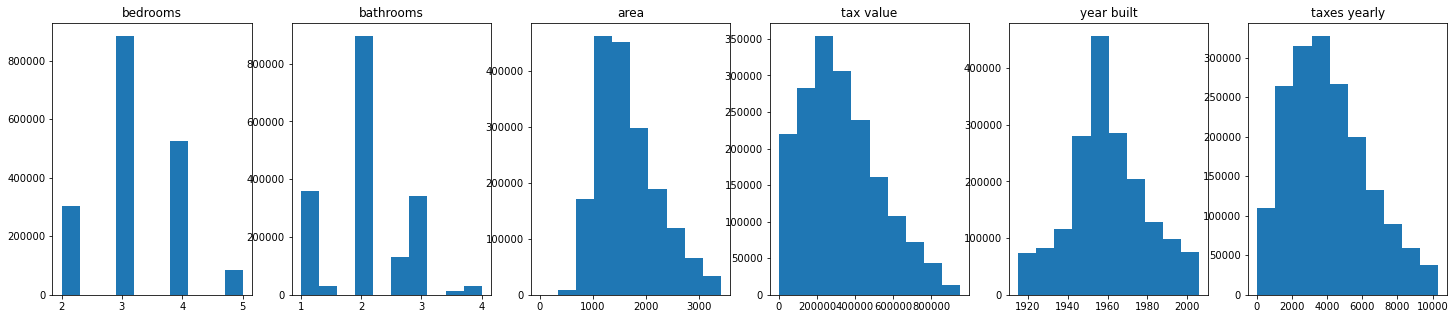

In [2]:
#acquire the data using recommended guidance (feature selection)
df0 = acquire.get_zillow_single_fam()
#prepare the file by dropping nulls, renaming columns
df = prepare.prep_zillow(df0)
##checking the distribution after removing outliers
df,train,validate,test = wrangle.wrangle_zillow(df)
#exploring our basic info
explore.univariate_explore(df[["bedrooms","bathrooms","area","tax value", "year built", "taxes yearly"]])

# Takeaway
here we see most things are somewhat normally distributed with barthrooms being a bit of an outlier in that remark (looks like due to half baths)

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

## This section will be going over exploration

### Bivariate exploration

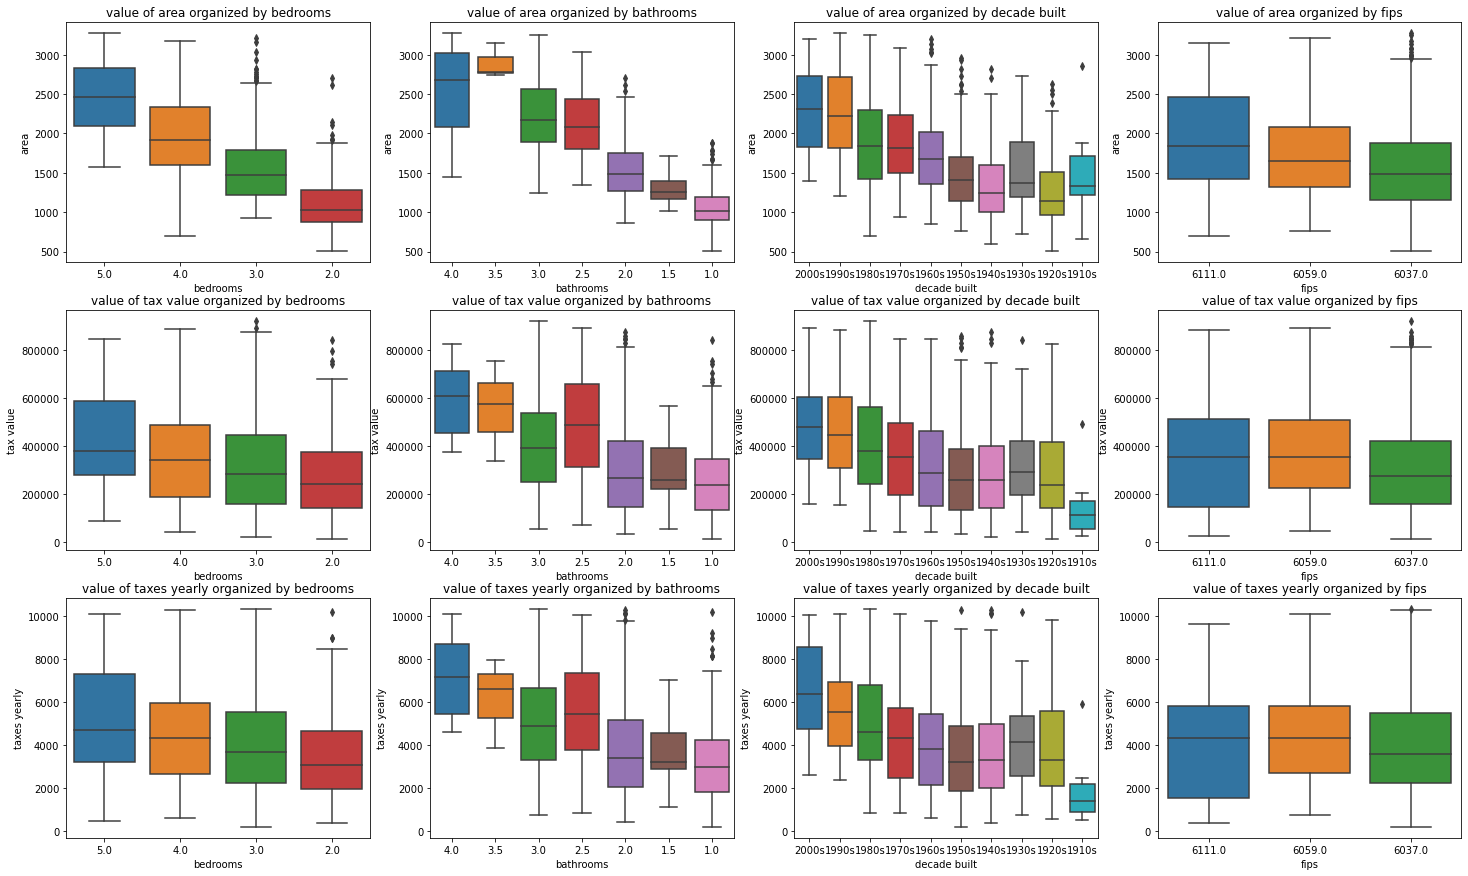

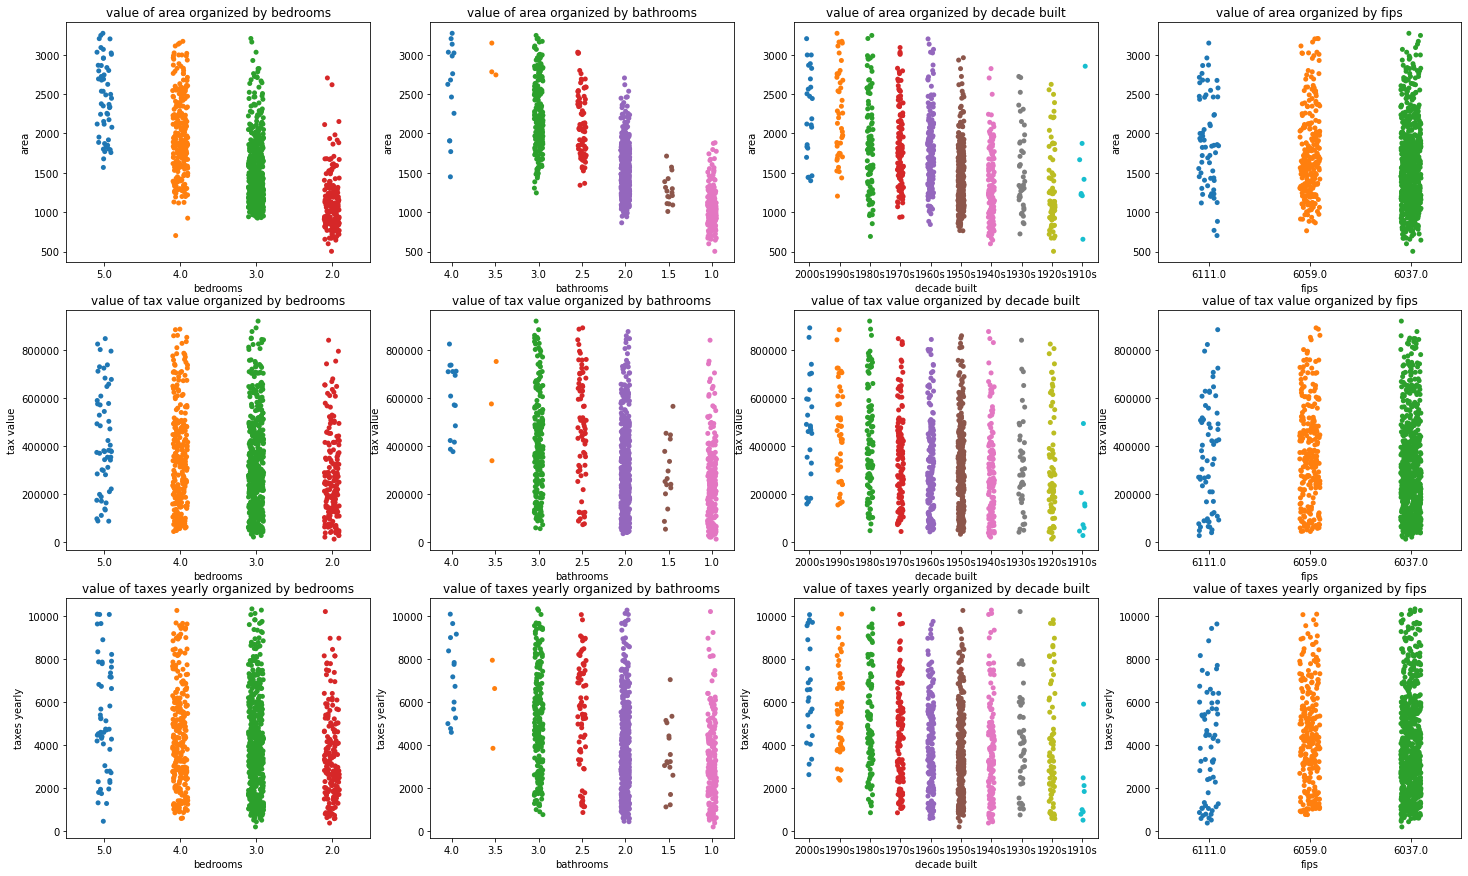

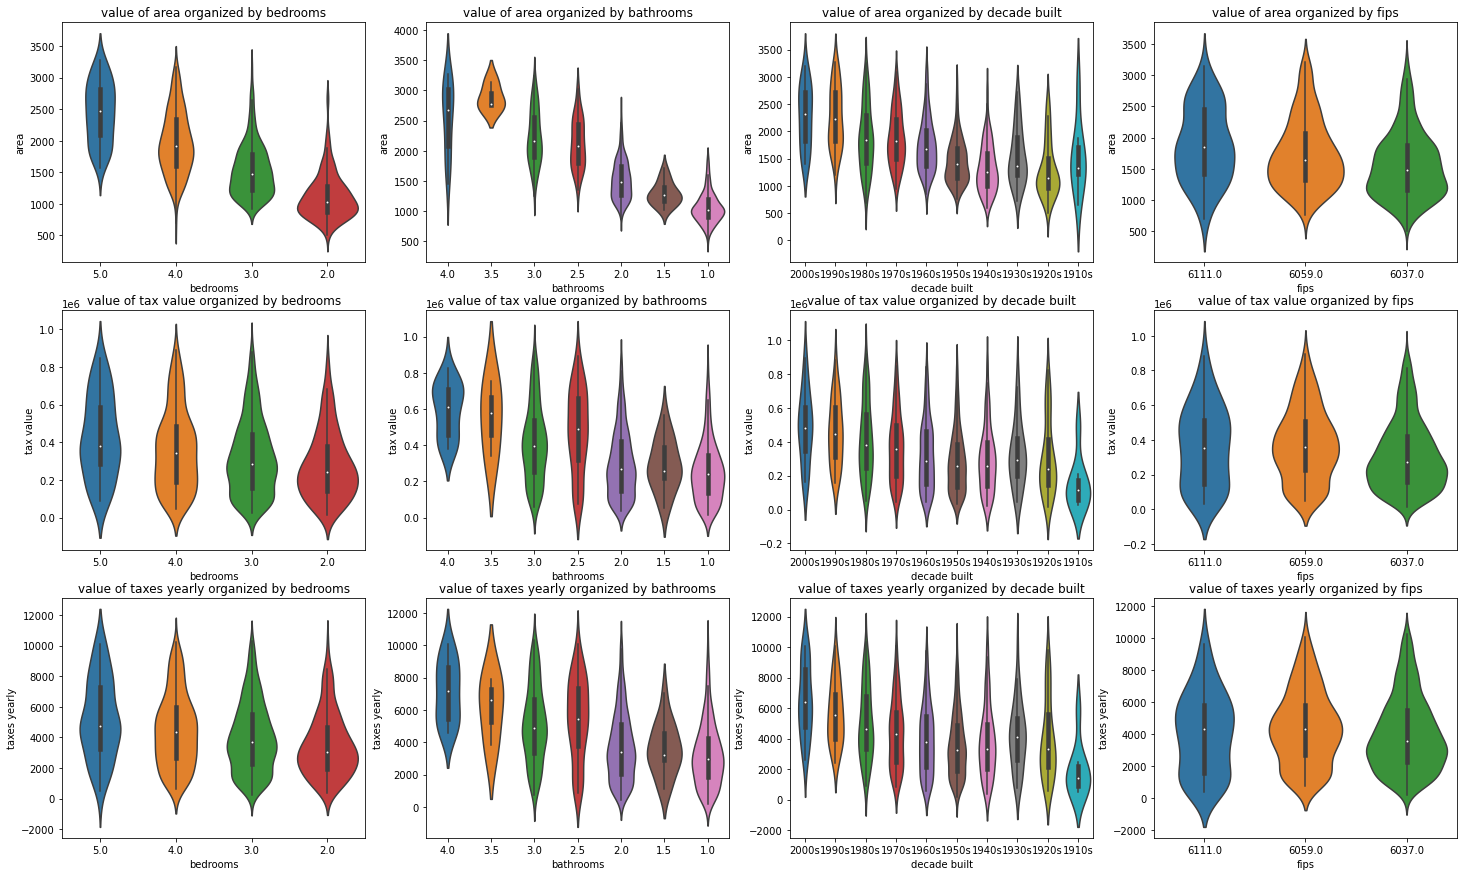

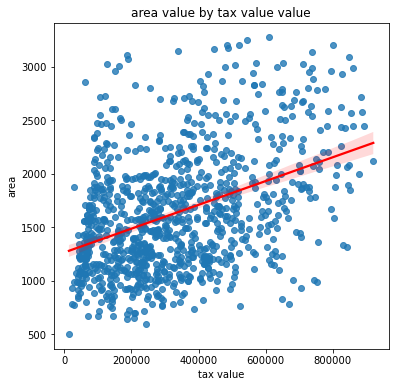

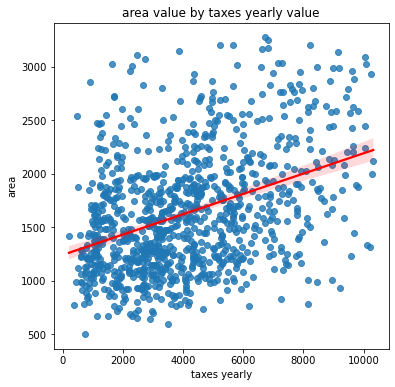

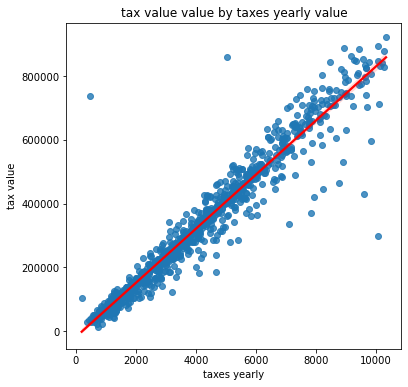

<Figure size 432x432 with 0 Axes>

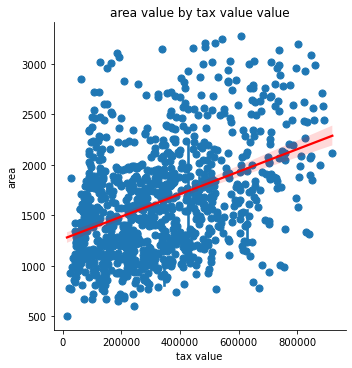

<Figure size 432x432 with 0 Axes>

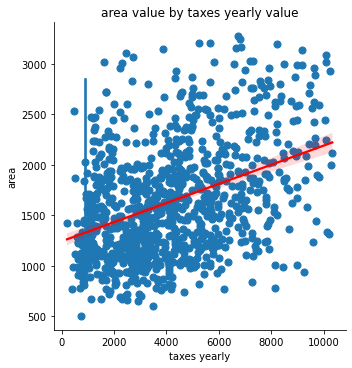

<Figure size 432x432 with 0 Axes>

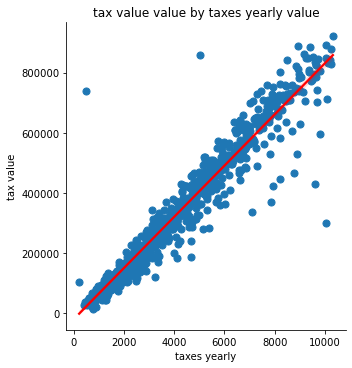

<Figure size 432x432 with 0 Axes>

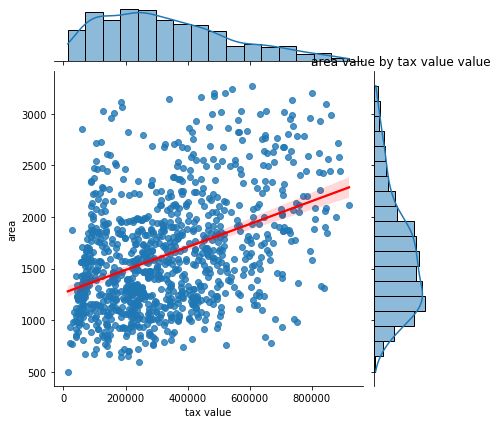

<Figure size 432x432 with 0 Axes>

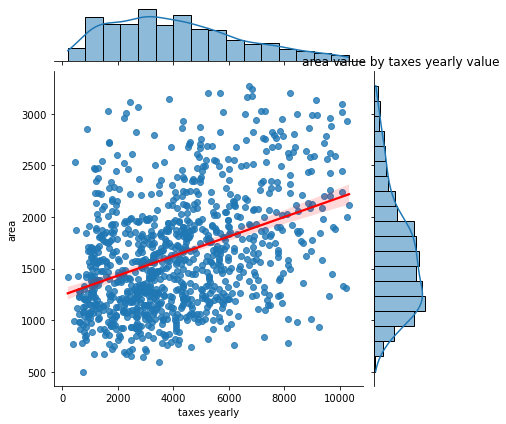

<Figure size 432x432 with 0 Axes>

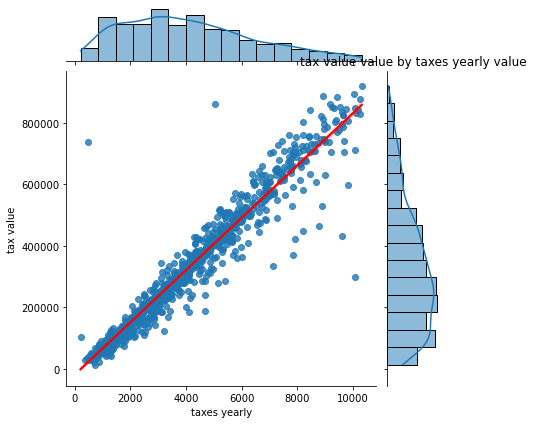

In [3]:
## i break my columns into categorical and numerical variables
cat_vars = ["bedrooms","bathrooms","decade built","fips"] # the categorical variables
num_vars = ["area","tax value", "taxes yearly"] # the numerical variables

# i then plot them out using an explore.py created just for this purpose
explore.plot_categorical_and_continuous_vars(train.sample(n=10000, random_state=123),num_vars,cat_vars)
explore.plot_variable_pairs(train.sample(n=10000, random_state=123),num_vars)

# Takeaways
> - tax value and taxes yearly are closely related
> - more area often has more bathrooms which trends with more bathrooms in turn related with more yearly taxes
> - 3.5 bathrooms is valued highly
> - general trend of area increasing with each decade

# We see certain things have a relation, so let's dive deeper into how they're related with a correlation heat map

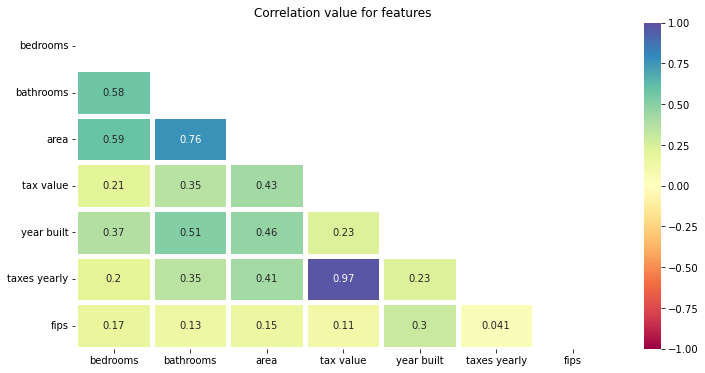

In [4]:
## create a heatmap of relationships between the variables
explore.heatmap_corr(train.sample(n=10000, random_state=123))

# Heatmap takeaways:
strong relationship between tax value and  taxes yearly (makes sense since your taxes yearly is based off tax value)

as well as area and bathrooms (also makes sense, larger house has more room for bathroom)




## Let's start asking our questions

> - **Hypothesis 1 -** 
> - alpha = .05
> - $H_0$ = "The distributions underlying the samples of Tax Value and Taxes Yearly are unrelated"
> -
> - $H_a$: "The distributions underlying the samples of Tax Value and Taxes Yearly are related"

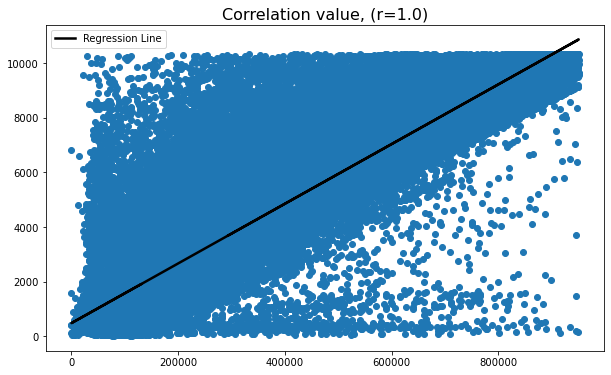

r = 0.970309851214055

 We reject the null Hypothesis ( T̶h̶a̶t̶ ̶t̶h̶e̶ ̶d̶i̶s̶t̶r̶i̶b̶u̶t̶i̶o̶n̶s̶ ̶u̶n̶d̶e̶r̶l̶y̶i̶n̶g̶ ̶t̶h̶e̶ ̶s̶a̶m̶p̶l̶e̶s̶ ̶o̶f̶ ̶t̶a̶x̶ ̶v̶a̶l̶u̶e̶ ̶a̶n̶d̶ ̶t̶a̶x̶e̶s̶ ̶y̶e̶a̶r̶l̶y̶ ̶a̶r̶e̶ ̶u̶n̶r̶e̶l̶a̶t̶e̶d̶ ) p=0.00000


In [5]:
## data is quantative, mostly normally distributed, and already removed most the outliers
## so will test with pearsonR

explore.pearsonr_corr_explore_plot(train,"tax value","taxes yearly")

### Correlation/PearsonR takeaway
- here we have a statistical test of PearsonR validating that there is a relationship between Tax Value and Taxes yearly with a relationship value of .97. this will be useful knowledge in our modelling

Continuing exploration of the heat map, we will test the Tax Value mean of each FIPs to see if there is a difference in the means based on location

> - **Hypothesis 2 -** 
> - alpha = .05
> - $H_0$ = "Tax value of FIPS has identical average values to Tax value of other FIPS"
> - $\mu_{Tax Value (FIPS_{n})} <= \mu_{Tax Value (FIPS_{n+1})}$.
> -
> - $H_a$: "Tax value of FIPS is not equal to Tax value of other FIPS"
> - $\mu_{Tax Value (FIPS_{n})} > \mu_{Tax Value (FIPS_{n+1})}$. 

-----------------------------
we can reject that there are equal variance in these two groups with 1.0 certainty Flag=F stat=73.02835, p=0.00000

 We reject the null Hypothesis ( t̶a̶x̶ ̶v̶a̶l̶u̶e̶ ̶o̶f̶ ̶f̶i̶p̶s̶6̶0̶5̶9̶.̶0̶ ̶h̶a̶s̶ ̶i̶d̶e̶n̶t̶i̶c̶a̶l̶ ̶a̶v̶e̶r̶a̶g̶e̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶t̶a̶x̶ ̶v̶a̶l̶u̶e̶ ̶o̶f̶ ̶o̶t̶h̶e̶r̶ ̶f̶i̶p̶s̶6̶0̶3̶7̶.̶0̶ ) t=16.69436, p=0.00000
-----------------------------
we can reject that there are equal variance in these two groups with 1.0 certainty Flag=F stat=8.05673, p=0.00455

 We reject the null Hypothesis ( t̶a̶x̶ ̶v̶a̶l̶u̶e̶ ̶o̶f̶ ̶f̶i̶p̶s̶6̶1̶1̶1̶.̶0̶ ̶h̶a̶s̶ ̶i̶d̶e̶n̶t̶i̶c̶a̶l̶ ̶a̶v̶e̶r̶a̶g̶e̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶t̶a̶x̶ ̶v̶a̶l̶u̶e̶ ̶o̶f̶ ̶o̶t̶h̶e̶r̶ ̶f̶i̶p̶s̶6̶0̶3̶7̶.̶0̶ ) t=6.87764, p=0.00000
-----------------------------
we can reject that there are equal variance in these two groups with 0.98 certainty Flag=F stat=5.52437, p=0.01881

 We reject the null Hypothesis ( t̶a̶x̶ ̶v̶a̶l̶u̶e̶ ̶o̶f̶ ̶f̶i̶p̶s̶6̶1̶1̶1̶.̶0̶ ̶h̶a̶s̶ ̶i̶d̶e̶n̶t̶i̶c̶a̶l̶ 

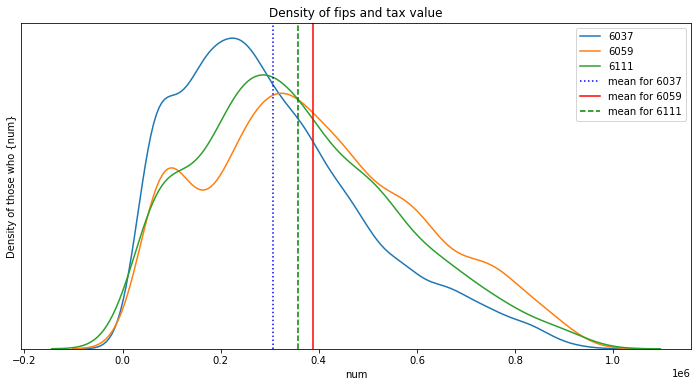

In [7]:
## will do test for homogeneity of variance and pass as flag to TTest using levene test
## samples are sufficent size, and mostly normally distributed


explore.cat_and_num_explore_plot(train.sample(n=10000, random_state=123),"fips","tax value")

> - ## Takeaway on TTest for FIPS and Tax Value
> - the 2 sided TTest yielded interesting results in that the the samples of FIPS did varied enough to pass our statistical significance (alpha = .05). This would indicate that seperating the data by FIPS will result in a significant difference. This will be important for our modeling

> - **Hypothesis 3 -** 
> - alpha = .05
> - $H_0$ = "Amount of bedrooms is independant of the amount bathrooms"
> - $H_a$:  "Amount of bedrooms is not independant of the amount bathrooms"

In [8]:
df1 = pd.crosstab(train.bedrooms,train.bathrooms)

chi2, p, degf, expected = stats.chi2_contingency(df1)

H0 = (f"{df1.index.name} is independant of {df1.columns.name}")
H1 = (f"{df1.index.name} is not independant of being {df1.columns.name}")

print('Observed')
print(df1.values)
print('---\nExpected')
print(expected)
print(f'---\nchi^2 = {chi2:.4f}, p = {p:.5f}, degf = {degf}')
if p>alpha:
    print(f"due to p={p:.5f} > α={alpha} we fail to reject our null hypothesis\n({H0})")
else:
    print(f"due to p = {p:.5f} < α = {alpha} we reject our null hypothesis\n(", '\u0336'.join(H0) + '\u0336' ,")")

Observed
[[119198   3694  51012   3165   4144    100    180]
 [ 91848  11794 328892  34162  59825   1275   2828]
 [  4139   2552 148136  37234 111359   3700   8589]
 [   332    136   9687   3572  29936   1828   6340]]
---
Expected
[[ 36228.93833968   3055.43035242  90393.23267575  13134.3496768
   34505.38379504   1160.41129637   3015.25386396]
 [105921.13292277   8933.04246071 264279.16611294  38400.38548539
  100882.04377501   3392.64921359   8815.58002958]
 [ 63020.62280243   5314.95353061 157239.98773962  22847.34068042
   60022.48137696   2018.54776749   5245.06610248]
 [ 10346.30593513    872.57365626  25814.61347169   3750.92415739
    9854.09105299    331.39172256    861.10000398]]
---
chi^2 = 502787.4285, p = 0.00000, degf = 18
due to p = 0.00000 < α = 0.05 we reject our null hypothesis
( b̶e̶d̶r̶o̶o̶m̶s̶ ̶i̶s̶ ̶i̶n̶d̶e̶p̶e̶n̶d̶a̶n̶t̶ ̶o̶f̶ ̶b̶a̶t̶h̶r̶o̶o̶m̶s̶ )


> - ## Takeaway on CHI2 for Bedrooms and Bathroom
> - The CHI^2 test provided a statistically significant result that allows us to reject our null hypothesis that bedrooms is independant of bathrooms, signifiying that there is a relationship that we can utilize in our modeling

-
-
-
-
-

In [9]:
train["bed/bath"] = train["bedrooms"]/train["bathrooms"]
train["yearly taxes per sqft"] = train["taxes yearly"] / train["area"]
train["tax value per taxes yearly per sqft"] = train["tax value"] / train["yearly taxes per sqft"] 
train["tax value binned"] = (((train["tax value"]//50_000)+0) *50_000).astype(int).astype(str) + "-" + (((train["tax value"]//50_000)+1) *50_000).astype(int).astype(str)
train["area binned"] = (((train["area"]//500)+0) *500).astype(int).astype(str) + "-" + (((train["area"]//500)+1) *500).astype(int).astype(str)

import plotly.express as px
import plotly

fig = px.scatter_3d( data_frame = train.sample(n=10000, random_state=123).sort_values(by=["decade built"]), 
                    #histfunc="avg",
                    z="tax value per taxes yearly per sqft", 
                    x="year built", 
                    y= "yearly taxes per sqft", 
                    #color="fips",
                    size= "taxes yearly",
                    size_max= 10,
                    symbol="fips",
                    #violinmode='overlay',
                    #marginal="box", # or violin, rug,
                    #points="all",
                    #nbins=10,
                   

                    hover_data=train.columns)

fig.update_xaxes(categoryorder='category ascending')
#fig.update_xaxes(categoryorder='total ascending')

fig.update_traces(marker_colorscale="blackbody",selector=dict(type='scatter'))

fig.update_layout(
    scene = dict(xaxis = dict(nticks=10, range=[1920,2010],),
                     yaxis = dict(nticks=6, range=[0,12],),
                     zaxis = dict(nticks=10, range=[0,500_000],),),
    autosize=False,
    width=1500,
    height=800,
    margin=dict(
        l=25,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)

plotly.offline.iplot(fig, validate=False)

In [10]:
train["bed/bath"] = train["bedrooms"]/train["bathrooms"]
train["area by taxes yearly"] = train["area"]/train["taxes yearly"]
train["tax value per taxes yearly per sqft"] = train["tax value"] / train["yearly taxes per sqft"] 
train["tax value binned"] = (((train["tax value"]//50_000)+0) *50_000).astype(int).astype(str) + "-" + (((train["tax value"]//50_000)+1) *50_000).astype(int).astype(str)
train["area binned"] = (((train["area"]//500)+0) *500).astype(int).astype(str) + "-" + (((train["area"]//500)+1) *500).astype(int).astype(str)

train["area by bedrooms"] = train["area"] / train["bedrooms"]
train["tax value by taxes yearly"] = train["tax value"] / train["taxes yearly"]
train["taxes yearly by bed/bath"] = train["taxes yearly"] / train["bed/bath"]

import plotly.express as px
import plotly

df = px.data.tips()
fig = px.scatter_3d( data_frame = train.sample(n=10000, random_state=123).sort_values(by=["decade built"]), 
                    #histfunc="avg",
                    x="area by taxes yearly", 
                    z="tax value by taxes yearly", 
                    y= "taxes yearly by bed/bath", 
                    #color="fips",
                    size= "taxes yearly",
                    size_max= 10,
                    symbol="fips",
                   

                    hover_data=train.columns)

fig.update_xaxes(categoryorder='category ascending')
#fig.update_xaxes(categoryorder='total ascending')

fig.update_traces(marker_colorscale="blackbody",selector=dict(type='scatter'))

fig.update_layout(
    scene = dict(xaxis = dict(nticks=10, range=[0,3],),
                     yaxis = dict(nticks=6, range=[0,15000],),
                     zaxis = dict(nticks=10, range=[0,150],),),
    autosize=False,
    width=1500,
    height=800,
    margin=dict(
        l=25,
        r=50,
        b=25,
        t=25,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)

plotly.offline.iplot(fig, validate=False)

In [11]:
train["last1"]=train["area"]/train["bedrooms"]/train["bathrooms"]
train.head()


bedrooms  bathrooms    area  tax value  year built  taxes yearly  \
1222525       2.0        1.0  1012.0   294422.0      1949.0       4149.40   
1382660       3.0        2.0  1961.0   627384.0      1953.0       7124.10   
2094882       3.0        2.0  1271.0   328921.0      1956.0       4027.52   
1791732       3.0        2.0  1474.0   542190.0      1927.0       6437.48   
933597        4.0        3.0  2268.0   540066.0      1973.0       6823.28   

           fips decade built  bed/bath  yearly taxes per sqft  \
1222525  6037.0        1940s  2.000000               4.100198   
1382660  6037.0        1950s  1.500000               3.632891   
2094882  6037.0        1950s  1.500000               3.168780   
1791732  6037.0        1920s  1.500000               4.367354   
933597   6037.0        1970s  1.333333               3.008501   

         tax value per taxes yearly per sqft tax value binned area binned  \
1222525                         71806.782667    250000-300000   1000-1500   
1382660                        172695.501748    600000-650000   1500-2000   
2094882                        103800.500308    300000-350000   1000-1500   
1791732                        124146.103755    500000-550000   1000-1500   
933597                         179513.326142    500000-550000   2000-2500   

         area by taxes yearly  area by bedrooms  tax value by taxes yearly  \
1222525              0.243891        506.000000                  70.955319   
1382660              0.275263        653.666667                  88.065019   
2094882              0.315579        423.666667                  81.668372   
1791732              0.228972        491.333333                  84.223951   
933597               0.332391        567.000000                  79.150497   

         taxes yearly by bed/bath       last1  
1222525               2074.700000  506.000000  
1382660               4749.400000  326.833333  
2094882               2685.013333  211.833333  
1791732               4291.653333  245.666667  
933597                5117.460000  189.000000

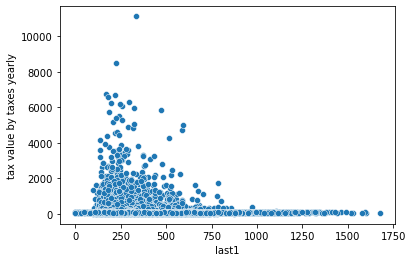

(0.0, 10000.0)

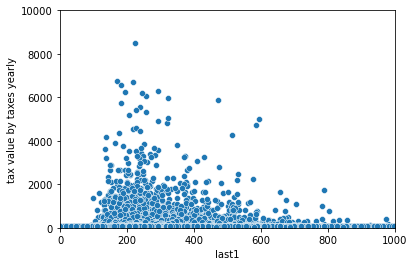

In [12]:
sns.scatterplot(data=train,x="last1",y="tax value by taxes yearly")
plt.show()
ax2=sns.scatterplot(data=train,x="last1",y="tax value by taxes yearly")
ax2.set_xlim(0,1000)
ax2.set_ylim(0,10_000)

<AxesSubplot:xlabel='bed/bath', ylabel='tax value per taxes yearly per sqft'>

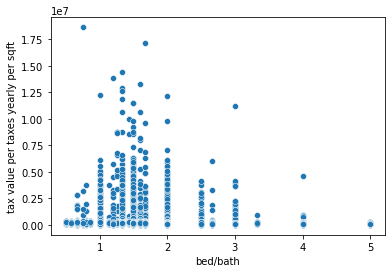

In [13]:
sns.scatterplot(data=train,y="tax value per taxes yearly per sqft",x="bed/bath")


In [14]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [15]:
#scale continous data

train_scaled = train.copy()

columns_to_scale = num_vars
scaler = MinMaxScaler()
train_scaled[columns_to_scale] = scaler.fit_transform(train_scaled[columns_to_scale])


In [16]:
X_train,X_validate = train[["taxes yearly"]],validate[["taxes yearly"]]
y_train,y_validate = train["tax value"],validate["tax value"]

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train) ##only use fit_transform for training, after that use transform (equations are created)
X_validate_scaled = scaler.transform(X_validate)

Text(0.5, 1.0, 'Scaled')

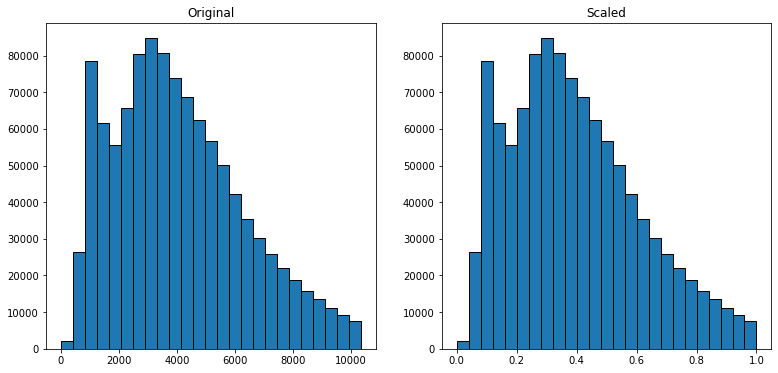

In [17]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')


-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

## playing with the data


bin_df = pd.DataFrame()
df = df[df["tax_value"]<500_000]

for col in temp_list:
    bin_df[f"{col} binned"] = pd.cut(df[col],5)
bin_df["fips"] = df.fips
bin_df["dummy"] = 1
bin_df



binned = bin_df.groupby(bin_df.drop(columns=["dummy"]).columns.tolist()).sum().reset_index()
binned = binned[binned.dummy > 0]
binned



import plotly.express as px
import plotly

s_list = [ 'fips','tax_value binned']

all = binned["dummy"].sum()
#binned["percentage"] = (round(((binned["dummy"]/all)*100),3).astype(str) + "%")
binned["percentage"] = (binned["dummy"]/all)

fig = px.sunburst(  binned, 
                    path=s_list,
                    labels=s_list,
                    values='dummy',
                    color = "tax_value binned"
                    )
plotly.offline.plot(fig, validate=False)


